# Microéconomie 5

Toulouse School of Economics </br>
Cours de microéconomie L3, Isabelle Dubec & David Alary </br>
Solutions des TD : Antoine Jacquet, https://antoine-jacquet.github.io

## TD2 : L’équilibre concurrentiel dans une économie d’échange

### Exercice 1 : Préférences Cobb-Douglas

Les dotations initiales sont $\omega^A = (16, 4)$ et $\omega^B = (3, 6)$. Les agents ont les fonctions d'utilité

\begin{aligned}
    U^A(x^A) &= (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2} \\
    U^B(x^B) &= \frac{1}{2} \ln(x_1^B) + \frac{1}{4} \ln(x_2^B).
\end{aligned}


*Définissons ces données du problème, et représentons la carte d'indifférence à titre d'illustration.*

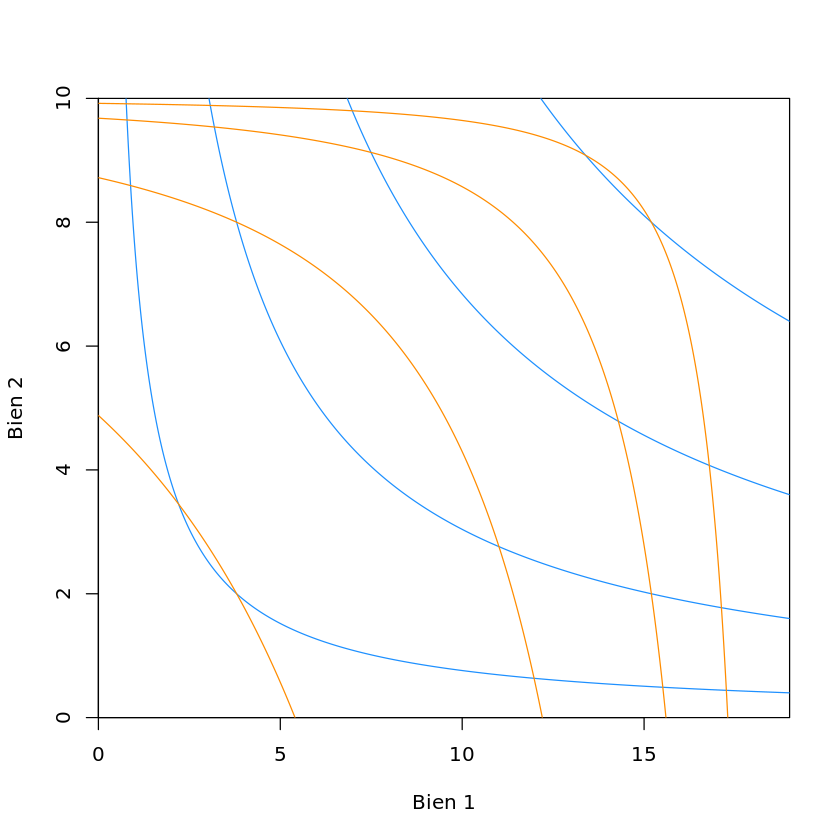

In [1]:
ωA <- c(16, 4)                                     # dotation initiale de A
ωB <- c(3, 6)                                      # dotation initiale de B
ω1 <- ωA[1] + ωB[1]                                # dotation totale en bien 1
ω2 <- ωA[2] + ωB[2]                                # dotation totale en bien 2
UA <- function(x1, x2) x1^(1/2) * x2^(1/2)         # fonction d'utilité de A
UB <- function(x1, x2) 1/2*log(x1) + 1/4*log(x2)   # fonction d'utilité de B

x1 <- seq(0, ω1, length=1000)                      # série de valeurs de x1 pour tracer les courbes

indiffA <- function(U) U^2/x1
indiffB <- function(U) exp(4*U)/x1^2

niveauxA <- seq(UA(ω1/5, ω2/5), UA(4*ω1/5, 4*ω2/5), len = 4)
niveauxB <- seq(UB(ω1/5, ω2/5), UB(4*ω1/5, 4*ω2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, ω2))
for (U in niveauxB) lines(x1, rev(ω2 - indiffB(U)), col = "darkorange", ylim = c(0, ω2))

#### Question 1.

La fonction d'utilité de $A$ représente manifestement des *préférences Cobb-Douglas* : on sait désormais (depuis le TD1) qu'elles sont donc *convexes*.

On remarque ensuite que l'utilité de $B$ s'obtient par une transformation strictement croissante (fonction logarithme $\ln$) d'une utilité Cobb-Douglas, puisque

\begin{equation}
    U^B(x^B) = \ln \left( (x_1^B)^\frac{1}{2} (x_2^B)^\frac{1}{4} \right).
\end{equation}

L'utilité de $B$ représente donc aussi des préférences Cobb-Douglas, et ainsi les préférences de $B$ sont aussi convexes.

Par définition, le taux marginal de substitution de l'agent $A$ exprimé en unités de bien 2 est

\begin{equation}
    \mathsf{TMS}^A = \frac{\partial U^A / \partial x_1^A}{\partial U^A / \partial x_2^A} = \frac{x_2^A}{x_1^A}.
\end{equation}

De façon similaire, celui de $B$ est

\begin{equation}
    \mathsf{TMS}^B = \frac{2 x_2^B}{x_1^A}.
\end{equation}

#### Question 2.

On cherche maintenant l'équilibre concurrentiel général (ou simplement équilibre général) de cette économie. Commençons par rappeler sa définition.

**Définition.** Un *équilibre général* est un vecteur de prix $p = (p_1, p_2)$ et une allocation $x = (x^A, x^B)$ tels que :
1. étant donné le vecteur de prix $p$, $x^i$ maximise l'utilité de l'agent $i$ sous sa contrainte budgétaire, et ce pour $i = A, B$,
2. les quantités demandées sont égales aux quantités offertes pour chaque bien.

Pour le calculer, on doit suivre deux étapes : d'abord trouver les **fonctions de demande de chaque agent**, puis écrire l'**équilibre d'un des deux marchés de bien** (le deuxième marché sera alors automatiquement équilibré d'après la loi de Walras).

#### Question 3.

Commençons par rappeler quelques définitions.

* Les *demandes brutes* des agents s'obtiennent en maximisant leur utilité sous contrainte de budget : on les note $x_1^A(p)$, $x_2^A(p)$, $x_1^B(p)$, $x_2^B(p)$.

* Les *demandes nettes* s'obtiennent en soustrayant les allocations initiales aux demandes brutes : $d_k^i(p) = x_k^i(p) - \omega_k^i$ ($\forall i = A, B; k = 1, 2$).

* Les *demandes nettes agrégées* s'obtiennent en sommant les demandes nettes des agents : $d_k(p) = d_k^A(p) + d_k^B(p)$ ($\forall k = 1,2$).

Énonçons maintenant la loi de Walras et son corollaire important dans le cas à deux biens.

**Loi de Walras.** Quelques soient les prix, la somme des demandes nettes agrégées et pondérées par les prix est nulle :

\begin{equation}
    p_1 d_1(p) + p_2 d_2(p) = 0 \qquad (\forall p).
\end{equation}

Son corollaire est que si l'un des marchés est équilibré, alors l'autre l'est aussi : par exemple, $d_1 = 0$ implique $d_2 = 0$.

Passons au calcul de cet équilibre.

**1. Fonctions de demande**

Pour un vecteur de prix $p = (p_1, p_2)$ donné chaque agent forme ses demandes en maximisant son utilité sous sa contrainte de budget.  

Pour $A$, cela veut dire (rappel de notation : $p \cdot x^A = p_1 x_1^A + p_2 x_2^A$)

\begin{equation}
    \max_{x^A} \; U^A(x^A) \qquad \text{s.c.} \; p \cdot x^A \leq p \cdot \omega^A.
\end{equation}

On forme le lagrangien de ce problème,
\begin{equation}
    \mathcal L(x^A, \mu) = (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2} + \mu(p_1 \omega_1^A + p_2 \omega_2^A - p_1 x_1^A - p_2 x_2^A)
\end{equation}

duquel on dérive les conditions du premier ordre
\begin{aligned}
    &\frac{1}{2} (x_1^A)^{-\frac{1}{2}} (x_2^A)^\frac{1}{2} - \mu p_1 = 0 \\
    &\frac{1}{2} (x_1^A)^\frac{1}{2} (x_2^A)^{-\frac{1}{2}} - \mu p_2 = 0 \\
    &p \cdot x^A = p \cdot \omega^A.
\end{aligned}

On en déduit
\begin{equation}
    \underbrace{\frac{x_2^A}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{p_1}{p_2} \iff p_1 x_1^A = p_2 x_2^A
\end{equation}

puis on utilise enfin la contrainte de budget pour écrire
\begin{equation}
    p_1 x_1^A = p_2 x_2^A \iff 2 p_1 x_1^A = p \cdot \omega^A 
\end{equation}

d'où les demandes brutes
\begin{equation}
    \boxed{ x_1^A(p) = \frac{p \cdot \omega^A}{2 p_1} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \frac{p \cdot \omega^A}{2 p_2} },
\end{equation}

c'est-à-dire que $A$ dépense $\frac{1}{2}$ de ses revenus en bien 1, et $\frac{1}{2}$ en bien 2 (on reconnaît les coefficients en exposant dans la fonction d'utilité de $A$).

Pour $B$ on suit le même raisonnement : on trouve
\begin{equation}
    \boxed{ x_1^B(p) = \frac{2 p \cdot \omega^B}{3 p_1} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \frac{p \cdot \omega^B}{3 p_2} }.
\end{equation}

De même, $B$ dépense $\frac{\frac{1}{2}}{\frac{1}{2} + \frac{1}{4}} = \frac{2}{3}$ de ses revenus en bien 1, et $\frac{\frac{1}{4}}{\frac{1}{2} + \frac{1}{4}} = \frac{1}{3}$ de ses revenus en bien 2.

*Note.* De manière générale, un agent $i$ avec des préférences Cobb-Douglas, $(x_1^i)^\alpha (x_2^i)^\beta$ où $\alpha, \beta > 0$, forme des demandes telles qu'une part $\frac{\alpha}{\alpha + \beta}$ de son revenu est dépensé en bien 1, et une part $\frac{\beta}{\alpha + \beta}$ en bien 2.
Cela veut dire que ses demandes vérifient $p_1 x_1^i(p) = \frac{\alpha}{\alpha + \beta} p \cdot \omega^i$ et $p_2 x_2^i(p) = \frac{\beta}{\alpha + \beta} p \cdot \omega^i$.


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré, soit

\begin{equation}
    x_1^A(p) + x_1^B(p) = \omega_1^A + \omega_1^B \iff \frac{p \cdot \omega^A}{2 p_1} + \frac{2 p \cdot \omega^B}{3 p_1} = \omega_1^A + \omega_1^B \iff \boxed{\frac{p_1}{p_2} = \frac{3 \omega_2^A + 4 \omega_2^B}{3 \omega_1^A + 2 \omega_1^B}} \overset{\text{A.N.}}{=} \frac{2}{3}.
\end{equation}

On en déduit enfin les allocations d'équilibre en réinjectant ce rapport de prix dans les demandes des agents :

\begin{equation}
    x_1^A = 11, \quad x_2^A = \frac{22}{3}, \qquad x_1^B = 8, \quad x_2^B = \frac{8}{3}.
\end{equation}

#### Question 4.

Les quantités échangées s'obtiennent en comparant les allocations initiale et finale d'un des deux agents.

Par exemple avec $A$ :
\begin{align}
    x_1^A - \omega_1^A &= 11 - 16 = -5 \\
    x_2^A - \omega_2^A &= \frac{22}{3} - 4 = \frac{10}{3},
\end{align}

c'est-à-dire que $A$ a échangé 5 unités de son bien 1 contre $\frac{10}{3}$ unités de bien 2 de $B$.

Les quantités échangées sont donc 5 unités de bien 1 et $\frac{10}{3}$ unités de bien 2.

#### Question 5.

La courbe des optima internes peut s'obtenir directement en égalisant les taux marginaux de substitution des deux agents, et en prenant en compte les contraintes de ressources :

\begin{equation}
    \underbrace{\frac{x_2^A}{x_1^A}}_{= \mathsf{TMS^A}}
    = \underbrace{\frac{2 x_2^B}{x_1^B}}_{= \mathsf{TMS^B}}
    = \frac{2(\omega_2 - x_2^A)}{\omega_1 - x_1^A}
\end{equation}

d'où l'équation
\begin{equation}
    \boxed{ x_2^A = \frac{2 \omega_2 x_1^A}{\omega_1 + x_1^A} }
    \overset{\text{A.N.}}{=} \frac{20 x_1^A}{19 + x_1^A}.
\end{equation}

#### Question 6.

L'allocation initiale ne se situe pas sur la courbe des optima. En effet,
\begin{equation}
    \omega_2^A = 4 \neq \frac{64}{7} = \frac{20 \omega_1^A}{19 + \omega_1^A}.
\end{equation}

Ce n'est donc pas un optimum de Pareto.

#### Question 7.

L'allocation d'équilibre est quant à elle bien un optimum de Pareto, puisque
\begin{equation}
    x_2^A = \frac{22}{3} = \frac{20 \times 11}{19 + 11} = \frac{20 x_1^A}{19 + x_1^A}.
\end{equation}

C'est la conséquence d'un résultat important, qui sera l'objet du TD suivant.

#### Question 8.

Rappellons que le coeur de l'économie correspond à toutes les allocations qui sont à la fois Pareto-optimales, et qui sont préférées par les deux agents à l'allocation initiale.

Nous avons vu à la question 7 que l'allocation d'équilibre est Pareto-optimale.

Elle est bien sûr aussi préférée par les deux agents à l'allocation initiale (sinon il n'y aurait pas d'échange volontaire entre eux). On peut s'en assurer en vérifiant qu'à l'allocation d'équilibre $x = (x^A, x^B)$ décrite ci-dessus,

\begin{align}
    U^A(x^A) &\geq U^A(\omega^A) \\
    U^B(x^B) &\geq U^B(\omega^B).
\end{align}

L'allocation d'équilibre fait donc bien partie du coeur de l'économie.

#### Question 9.

Les prix d'équilibre concurrentiel constituent un taux d'échange entre les deux biens, qui permet notamment aux agents de sélectionner une des allocations parmi celles du coeur de l'économie.

*Représentons cet équilibre dans la boîte d'Edgeworth. L'allocation initiale est notée $I$, et celle d'équilibre $E$. Les courbes d'indifférence des agents sont en bleu et orange, et la courbe des optima en violet. La droite de budget à l'équilibre est en pointillés. On constate bien que l'allocation d'équilibre se situe dans le coeur de l'économie.*

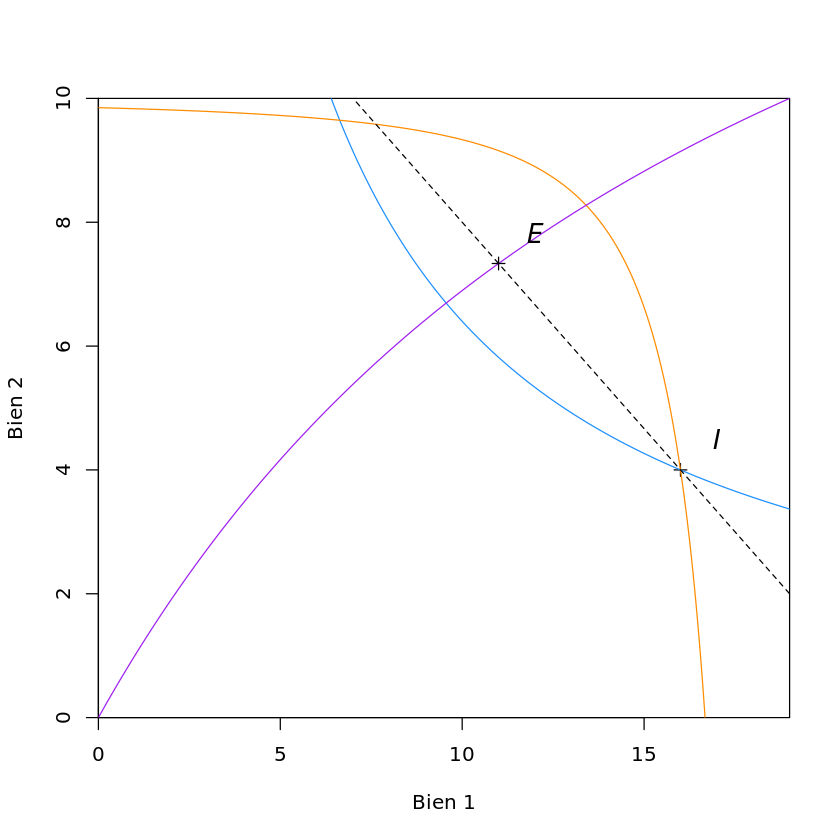

In [2]:
x1A <- function(p) crossprod(p, ωA)/(2*p[1])      # demande de A en bien 1
x2A <- function(p) crossprod(p, ωA)/(2*p[2])      # demande de A en bien 2
x1B <- function(p) 2*crossprod(p, ωB)/(3*p[1])    # demande de B en bien 1
x2B <- function(p) crossprod(p, ωB)/(3*p[2])      # demande de B en bien 2
r <- (3*ωA[2] + 4*ωB[2])/(3*ωA[1] + 2*ωB[1])      # rapport des prix à l'équilibre

I <- ωA                                   # dotations initiales
E <- c(x1A(c(r, 1)), x2A(c(r, 1)))        # équilibre concurrentiel
optima <- function(x) 2*x*ω2/(ω1 + x)     # courbe des optima

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                     # allocation initiale I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, ω2))         # courbe d'indifférence de A
lines(x1, rev(ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2]))), col = "darkorange", ylim = c(0, ω2)) # c.i. de B
lines(x1, optima(x1), col = "purple", lwd = 1)                                  # courbe des optima
lines(x1, r*ωA[1] + ωA[2] - r*x1, lty = 2)                                      # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                       # équilibre concurrentiel E
    text(E[1]+.05*ω1, E[2]+.05*ω2, labels = "E", cex = 1.3, font = 3)